Fonte dos dados geográficos: Open Street Map (https://www.openstreetmap.org/)

In [ ]:
!pip install osmnx

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
!pip uninstall numpy
!pip install numpy

In [ ]:
# modulos necessários para rodar este notebook
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import networkx as nx
import time

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
SJC = ox.graph.graph_from_place('São José dos Campos, SP, Brazil',network_type='drive',simplify = True)

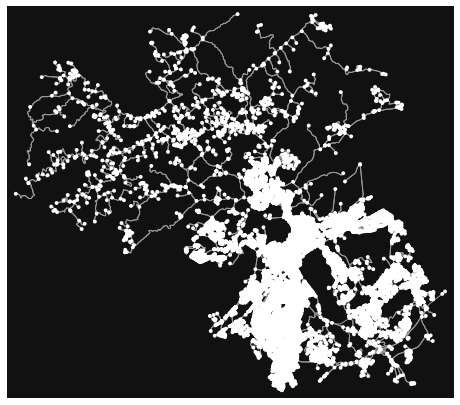

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5344c3f40>)

In [ ]:
ox.plot_graph(SJC)

In [ ]:
SJC.number_of_nodes()

13715

In [ ]:
SJC.number_of_edges()

31019

Tempo do algoritmo: 0.054427146911621094
Tempo do algoritmo: 0.7911155223846436


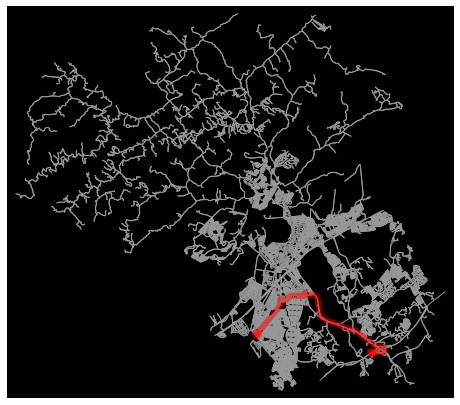

In [ ]:
#From https://github.com/gboeing/osmnx-examples/blob/v0.13.0/notebooks/02-routing-speed-time.ipynb
# find the shortest path (by distance) between these nodes then plot it
orig = list(SJC)[3]
dest = list(SJC)[-3]
inicio = time.time()
route = nx.shortest_path(SJC, orig, dest, weight='length',method = 'dijkstra')
final = time.time()
print('Tempo do algoritmo: {}'.format(final-inicio))
route = nx.shortest_path(SJC, orig, dest, weight='length',method = 'bellman-ford')
final = time.time()
print('Tempo do algoritmo: {}'.format(final-inicio))
fig, ax = ox.plot_graph_route(SJC, route, route_linewidth=6, node_size=0, bgcolor='k')

In [ ]:
SJC.edges(8959626342, 1448949478, 0)

OutMultiEdgeDataView([(8959626342, 1448949478, None)])

In [ ]:
def bellman_ford(G,source):
  #Initialization
  distancias = {v: float('inf') for v in G.nodes()}
  previous_node = {v: [] for v in G.nodes()}
  distancias[source] = 0
  #Relaxing edges
  for i in range(G.number_of_nodes()-1):  #repeat V-1 times
    for edge in G.out_edges.data("length",default=0):
      u,v,w = edge[0],edge[1],edge[2]
      #u é o primeiro vértice, v é o segundo vértice e w é o peso
      if(distancias[v] > distancias[u] + w):
        distancias[v] = distancias[u] + w
        previous_node[v] = u

  #Verify whether there is a negative cycle
  for edge in G.out_edges.data("length",default=0):
      u,v,w = edge[0],edge[1],edge[2]
      if(distancias[v] > distancias[u] + w):
        return False
  
  return distancias, previous_node

#bellman_ford_ruim(SJC_reduzido,1437643827)

In [ ]:
length, path = nx.single_source_bellman_ford(sao_jose, 1437643827,weight='length')

In [ ]:
def dijkstra_meu(G,source):
  #Initialization
  distancias = {v: float('inf') for v in G.nodes()}
  previous_node = {v: [] for v in G.nodes()}
  distancias[source] = 0
  #Criando pilha de prioridade com os vértices do grafo
  from queue import PriorityQueue
  unvisited = PriorityQueue()
  #Vamos apenas o nosso nó fonte na pilha de prioridade
  unvisited.put((distancias[source],source))
  #Vamos criar um conjunto para armazenar o conjunto dos nós visitados
  visited = set()
  #Enquanto a lista dos não visitados não estiver vazia, vamos repetir o loop abaixo
  while (not unvisited.empty()):
    #Para extrair o vértice em Q com distância mínima, basta extrair normalmente,
    #pois Q é uma fila de prioridade
    current_node = unvisited.get()[1]   #usamos o índice 1 para pegar o nó e não a distância
    if(current_node not in visited):
      visited.add(current_node)
      #Realizar o seguinte loop para cada vizinho do current_node
      for neighbor in G._adj[current_node]:
        u,v,w = current_node, neighbor, G._adj[current_node][neighbor][0]['length']
        if(distancias[v] > distancias[u] + w):
          distancias[v] = distancias[u] + w
          previous_node[v] = u
          #now, add the neighbor in the priority queue
          unvisited.put((distancias[v],v))
  return distancias,previous_node

In [ ]:
def dijkstra_tempo(G,source):
  #Initialization
  distancias = {v: float('inf') for v in G.nodes()}
  previous_node = {v: [] for v in G.nodes()}
  distancias[source] = 0
  #Criando pilha de prioridade com os vértices do grafo
  from queue import PriorityQueue
  unvisited = PriorityQueue()
  #Vamos apenas o nosso nó fonte na pilha de prioridade
  unvisited.put((distancias[source],source))
  #Vamos criar um conjunto para armazenar o conjunto dos nós visitados
  visited = set()
  #Enquanto a lista dos não visitados não estiver vazia, vamos repetir o loop abaixo
  while (not unvisited.empty()):
    #Para extrair o vértice em Q com distância mínima, basta extrair normalmente,
    #pois Q é uma fila de prioridade
    current_node = unvisited.get()[1]   #usamos o índice 1 para pegar o nó e não a distância
    if(current_node not in visited):
      visited.add(current_node)
      #Realizar o seguinte loop para cada vizinho do current_node
      for neighbor in G._adj[current_node]:
        u,v,w = current_node, neighbor, G._adj[current_node][neighbor][0]['travel_time']
        if(distancias[v] > distancias[u] + w):
          distancias[v] = distancias[u] + w
          previous_node[v] = u
          #now, add the neighbor in the priority queue
          unvisited.put((distancias[v],v))
  return distancias,previous_node

In [ ]:
length, path = nx.single_source_dijkstra(SJC_reduzido, 1437643827,weight='length')
#length

## **Experimentos**

# Grafo centrado no parque Santos Dumont

Raio máximo de 20km

In [ ]:
sao_jose = ox.graph.graph_from_point((-23.19952497440106, -45.891388175461884),dist=20000,network_type="drive")
sao_jose.number_of_nodes(),sao_jose.number_of_edges()

(25024, 57691)

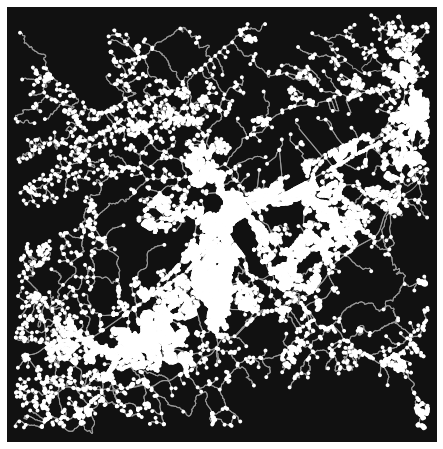

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7befa36b50>)

In [ ]:
ox.plot_graph(sao_jose)

In [ ]:
#PONTOS DE INTERESSE

#UNIFESP
unifesp_node = ox.distance.nearest_nodes(sao_jose, [-45.79322023006784], [-23.16378515128417],return_dist=True)
unifesp_node_id = unifesp_node[0][0]

#IGREJA BATISTA MARANATA
ibm_node = ox.distance.nearest_nodes(sao_jose, [-45.81885204879513], [-23.2699964575082],return_dist=True)
ibm_node_id = ibm_node[0][0]

#DCTA
dcta_node = ox.distance.nearest_nodes(sao_jose, [-45.88247597549695], [-23.205247422741433],return_dist=True)
dcta_node_id = dcta_node[0][0]

#Mercado
mercado_node = ox.distance.nearest_nodes(sao_jose, [-45.90604682413009], [-23.215840414341194],return_dist=True)
mercado_node_id = mercado_node[0][0]

#Possíveis lugares para morar:
#Jardim Satélite
jardim_satelite = ox.distance.nearest_nodes(sao_jose, [-45.87824887589778], [-23.230935797398406],return_dist=True)
jardim_satelite_id = jardim_satelite[0][0]

#Jardim São Dimas
jardim_sao_dimas = ox.distance.nearest_nodes(sao_jose, [-45.887805791523746], [-23.19760765271965],return_dist=True)
jardim_sao_dimas_id = jardim_sao_dimas[0][0]

#Vila Adyana
vila_adyana = ox.distance.nearest_nodes(sao_jose, [-45.890864647525326], [-23.197377438845702],return_dist=True)
vila_adyana_id = vila_adyana[0][0]

#Jardim Aquarius
jardim_aquarius = ox.distance.nearest_nodes(sao_jose, [-45.91062214409165], [-23.22485539859372],return_dist=True)
jardim_aquarius_id = jardim_aquarius[0][0]

#Jardim das Flores
jardim_flores = ox.distance.nearest_nodes(sao_jose, [-45.79919031619712], [-23.14631802842003],return_dist=True)
jardim_flores_id = jardim_flores[0][0]

APLICAÇÃO DE DIKSTRA LEVANDO EM CONSIDERAÇÃO DISTÂNCIA

In [ ]:
#DIJKSTRA
#JARDIM SATÉLITE
distancias,previous_node = dijkstra_meu(sao_jose,jardim_satelite_id)

print(f"Distância até Unifesp: {distancias[unifesp_node_id]}")
print(f"Distância até IBM: {distancias[ibm_node_id]}")
print(f"Distância até DCTA: {distancias[dcta_node_id]}")
print(f"Distância até Mercado: {distancias[mercado_node_id]}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/4
print(f"Média das distâncias: {media}")

Distância até Unifesp: 16870.832000000002
Distância até IBM: 7957.1280000000015
Distância até DCTA: 5044.839000000002
Distância até Mercado: 7511.738
Média das distâncias: 9346.134250000001


In [ ]:
#DIJKSTRA
#JARDIM SÃO DIMAS
distancias,previous_node = dijkstra_meu(sao_jose,jardim_sao_dimas_id)

print(f"Distância até Unifesp: {distancias[unifesp_node_id]}")
print(f"Distância até IBM: {distancias[ibm_node_id]}")
print(f"Distância até DCTA: {distancias[dcta_node_id]}")
print(f"Distância até Mercado: {distancias[mercado_node_id]}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/4
print(f"Média das distâncias: {media}")

Distância até Unifesp: 13269.614999999996
Distância até IBM: 12714.674000000003
Distância até DCTA: 1705.647
Distância até Mercado: 4232.918999999998
Média das distâncias: 7980.713749999999


In [ ]:
#DIJKSTRA
#VILA ADYANA
distancias,previous_node = dijkstra_meu(sao_jose,vila_adyana_id)

print(f"Distância até Unifesp: {distancias[unifesp_node_id]}")
print(f"Distância até IBM: {distancias[ibm_node_id]}")
print(f"Distância até DCTA: {distancias[dcta_node_id]}")
print(f"Distância até Mercado: {distancias[mercado_node_id]}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/4
print(f"Média das distâncias: {media}")

Distância até Unifesp: 13711.308999999996
Distância até IBM: 13156.368
Distância até DCTA: 2147.341
Distância até Mercado: 3804.2739999999994
Média das distâncias: 8204.822999999999


In [ ]:
#DIJKSTRA
#JARDIM AQUARIUS
distancias,previous_node = dijkstra_meu(sao_jose,jardim_aquarius_id)

print(f"Distância até Unifesp: {distancias[unifesp_node_id]}")
print(f"Distância até IBM: {distancias[ibm_node_id]}")
print(f"Distância até DCTA: {distancias[dcta_node_id]}")
print(f"Distância até Mercado: {distancias[mercado_node_id]}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/4
print(f"Média das distâncias: {media}")

Distância até Unifesp: 17191.202000000005
Distância até IBM: 14906.733999999999
Distância até DCTA: 5627.233999999999
Distância até Mercado: 1858.8949999999998
Média das distâncias: 9896.016249999999


In [ ]:
#DIJKSTRA
#JARDIM DAS FLORES
distancias,previous_node = dijkstra_meu(sao_jose,jardim_flores_id)

print(f"Distância até Unifesp: {distancias[unifesp_node_id]}")
print(f"Distância até IBM: {distancias[ibm_node_id]}")
print(f"Distância até DCTA: {distancias[dcta_node_id]}")
print(f"Distância até Mercado: {distancias[mercado_node_id]}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/4
print(f"Média das distâncias: {media}")

Distância até Unifesp: 6430.589
Distância até IBM: 22774.63599999998
Distância até DCTA: 14357.813
Distância até Mercado: 18964.036
Média das distâncias: 15631.768499999995


APLICAÇÃO DE DIJKSTRA LEVANDO EM CONSIDERAÇÃO TEMPO

  O travel time é dado em segundos.

  Referência: https://github.com/gboeing/osmnx/blob/main/osmnx/speed.py

In [ ]:
#Referência: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/02-routing-speed-time.ipynb

#É necessário fazer a imputação de velocidades em algumas arestas nas quais a velocidade está faltandao
#Tal imputaçõa é feita usando a média das velocidades máximas por tipo de avenida
sao_jose = ox.add_edge_speeds(sao_jose)
#Tendo velocidade definida em todas as arestas, podemos calcular o tempo para percorrer cada aresta:
sao_jose = ox.add_edge_travel_times(sao_jose)

In [ ]:
#DIJKSTRA
#JARDIM SATÉLITE
distancias,previous_node = dijkstra_tempo(sao_jose,jardim_satelite_id)

print(f"Tempo até Unifesp: {distancias[unifesp_node_id]/60}")
print(f"Tempo até IBM: {distancias[ibm_node_id]/60}")
print(f"Tempo até DCTA: {distancias[dcta_node_id]/60}")
print(f"Tempo até Mercado: {distancias[mercado_node_id]/60}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/(4*60)
print(f"Média dos tempos: {media}")

Tempo até Unifesp: 14.110000000000003
Tempo até IBM: 4.931666666666667
Tempo até DCTA: 5.643333333333335
Tempo até Mercado: 7.010000000000001
Média dos tempos: 7.923750000000001


In [ ]:
#DIJKSTRA
#JARDIM SÃO DIMAS
distancias,previous_node = dijkstra_tempo(sao_jose,jardim_sao_dimas_id)

print(f"Tempo até Unifesp: {distancias[unifesp_node_id]/60}")
print(f"Tempo até IBM: {distancias[ibm_node_id]/60}")
print(f"Tempo até DCTA: {distancias[dcta_node_id]/60}")
print(f"Tempo até Mercado: {distancias[mercado_node_id]/60}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/(4*60)
print(f"Média dos tempos: {media}")

Tempo até Unifesp: 11.025000000000002
Tempo até IBM: 9.221666666666666
Tempo até DCTA: 2.1183333333333336
Tempo até Mercado: 4.661666666666665
Média dos tempos: 6.756666666666666


In [ ]:
#DIJKSTRA
#VILA ADYANA
distancias,previous_node = dijkstra_tempo(sao_jose,vila_adyana_id)

print(f"Tempo até Unifesp: {distancias[unifesp_node_id]/60}")
print(f"Tempo até IBM: {distancias[ibm_node_id]/60}")
print(f"Tempo até DCTA: {distancias[dcta_node_id]/60}")
print(f"Tempo até Mercado: {distancias[mercado_node_id]/60}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/(4*60)
print(f"Média dos tempos: {media}")

Tempo até Unifesp: 11.565000000000001
Tempo até IBM: 9.173333333333334
Tempo até DCTA: 2.658333333333333
Tempo até Mercado: 4.085
Média dos tempos: 6.870416666666667


In [ ]:
#DIJKSTRA
#JARDIM AQUARIUS
distancias,previous_node = dijkstra_tempo(sao_jose,jardim_aquarius_id)

print(f"Tempo até Unifesp: {distancias[unifesp_node_id]/60}")
print(f"Tempo até IBM: {distancias[ibm_node_id]/60}")
print(f"Tempo até DCTA: {distancias[dcta_node_id]/60}")
print(f"Tempo até Mercado: {distancias[mercado_node_id]/60}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/(4*60)
print(f"Média dos tempos: {media}")

Tempo até Unifesp: 14.798333333333334
Tempo até IBM: 10.176666666666668
Tempo até DCTA: 6.051666666666666
Tempo até Mercado: 2.025
Média dos tempos: 8.262916666666666


In [ ]:
#DIJKSTRA
#JARDIM DAS FLORES
distancias,previous_node = dijkstra_tempo(sao_jose,jardim_flores_id)

print(f"Tempo até Unifesp: {distancias[unifesp_node_id]/60}")
print(f"Tempo até IBM: {distancias[ibm_node_id]/60}")
print(f"Tempo até DCTA: {distancias[dcta_node_id]/60}")
print(f"Tempo até Mercado: {distancias[mercado_node_id]/60}")
media = (distancias[unifesp_node_id]+distancias[ibm_node_id]+distancias[dcta_node_id]+distancias[mercado_node_id])/(4*60)
print(f"Média dos tempos: {media}")

Tempo até Unifesp: 8.786666666666664
Tempo até IBM: 20.281666666666663
Tempo até DCTA: 11.92166666666667
Tempo até Mercado: 16.373333333333335
Média dos tempos: 14.340833333333332


# Experimento de análise de tempo de execução

Grafo com raio de 1km

In [ ]:
sao_jose_1 = ox.graph.graph_from_point((-23.19952497440106, -45.891388175461884),dist=1000,network_type="drive")
sao_jose_1.number_of_nodes(),sao_jose_1.number_of_edges()

In [ ]:
print(f"Número de nós: {sao_jose_1.number_of_nodes()}")
print(f"Número de arestas: {sao_jose_1.number_of_edges()}")

#DIJKSTRA
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = dijkstra_meu(sao_jose_1,1424448517)
final = time.time()
print(f"Tempo de execucao de Dijkstra: {final-inicio}")

#BELLMAN FORD
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = bellman_ford(sao_jose_1,1424448517)
final = time.time()
print(f"Tempo de execucao de Bellman Ford: {final-inicio}")

Número de nós:515
Número de arestas:918
Tempo de execucao de Dijkstra: 0.008167028427124023
Tempo de execucao de Bellman Ford: 0.9664406776428223


Grafo com raio de 2km

In [ ]:
sao_jose_2 = ox.graph.graph_from_point((-23.19952497440106, -45.891388175461884),dist=2000,network_type="drive")
sao_jose_2.number_of_nodes(),sao_jose_2.number_of_edges()

(1422, 2829)

In [ ]:
print(f"Número de nós: {sao_jose_2.number_of_nodes()}")
print(f"Número de arestas: {sao_jose_2.number_of_edges()}")

#DIJKSTRA
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = dijkstra_meu(sao_jose_2,1424448517)
final = time.time()
print(f"Tempo de execucao de Dijkstra: {final-inicio}")

#BELLMAN FORD
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = bellman_ford(sao_jose_2,1424448517)
final = time.time()
print(f"Tempo de execucao de Bellman Ford: {final-inicio}")

Número de nós: 1422
Número de arestas: 2829
Tempo de execucao de Dijkstra: 0.016765117645263672
Tempo de execucao de Bellman Ford: 5.163561105728149


Grafo com raio de 3km

In [ ]:
sao_jose_3 = ox.graph.graph_from_point((-23.19952497440106, -45.891388175461884),dist=3000,network_type="drive")
sao_jose_3.number_of_nodes(),sao_jose_3.number_of_edges()

(2604, 5320)

In [ ]:
print(f"Número de nós: {sao_jose_3.number_of_nodes()}")
print(f"Número de arestas: {sao_jose_3.number_of_edges()}")

#DIJKSTRA
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = dijkstra_meu(sao_jose_3,1424448517)
final = time.time()
print(f"Tempo de execucao de Dijkstra: {final-inicio}")

#BELLMAN FORD
#JARDIM SATÉLITE
inicio = time.time()
distancias,previous_node = bellman_ford(sao_jose_3,1424448517)
final = time.time()
print(f"Tempo de execucao de Bellman Ford: {final-inicio}")

Número de nós: 2604
Número de arestas: 5320
Tempo de execucao de Dijkstra: 0.05544853210449219
Tempo de execucao de Bellman Ford: 21.95063591003418


Referências:

Para Dijkstra:
* Pseudo-código de https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
* E pseudo-código de https://drops.dagstuhl.de/opus/volltexte/2022/15978/pdf/LIPIcs-FUN-2022-8.pdf

A ideia de usar dicionários (que funcionam como hash) veio da implementação do Bellman Ford da NetworkX.

Para imputar velocidades máximas em arestas e calcular tempo para percorrer cada aresta: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/02-routing-speed-time.ipynb

Referência principail que vou usar para fazer análise dos resultados:

https://max-coding.medium.com/osmnx-part-1-loading-data-from-open-street-maps-and-finding-shortest-route-between-two-points-5bb073b0a27d

Lat,longs:

* Unifesp: -23.16378515128417, -45.79322023006784

* Igreja Batista Maranata: -23.2699964575082, -45.81885204879513

* CTA: -23.205247422741433, -45.88247597549695

* Super Mercado Carrefour: -23.215840414341194, -45.90604682413009


Possíveis locais para morar:

* Jardim Satélite: -23.230935797398406, -45.87824887589778 (residencial Londres)

* Jardim São Dimas: -23.19760765271965, -45.887805791523746 (condomínio edicício Vivendas de São Dimas)

* Vila Adyana: -23.197377438845702, -45.890864647525326 (condomínio edifício villa lobos)

* Jardim Aquarius: -23.22485539859372, -45.91062214409165 (The view club residence)

* Jardim das Flores: -23.14631802842003, -45.79919031619712 (república próxima a Unifesp) 